In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

c:\Users\ADMIN\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
x_train = x_train.reshape(-1,28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
model = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32,(3,3), activation="relu",padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3),activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
        ]
)

In [6]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 161s 415ms/step - accuracy: 0.8055 - loss: 0.5615 - val_accuracy: 0.5561 - val_loss: 1.9472
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 196ms/step - accuracy: 0.8656 - loss: 0.3752 - val_accuracy: 0.8955 - val_loss: 0.2845
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 189ms/step - accuracy: 0.8864 - loss: 0.3142 - val_accuracy: 0.8962 - val_loss: 0.2856
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 182ms/step - accuracy: 0.8966 - loss: 0.2830 - val_accuracy: 0.9091 - val_loss: 0.2497
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 205ms/step - accuracy: 0.9084 - loss: 0.2496 - val_accuracy: 0.9130 - val_loss: 0.2478
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step - accuracy: 0.9129 - loss: 0.2314 - val_accuracy: 0.9167 - val_loss: 0.2492
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 140ms/step - accuracy: 0.9204 - loss: 0.2139 - val_accuracy: 0.9102 - val_loss: 0.2404
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 139ms/step - accuracy: 0.9238 - loss: 

In [9]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9021 - loss: 0.2934
Test accuracy: 90.21%


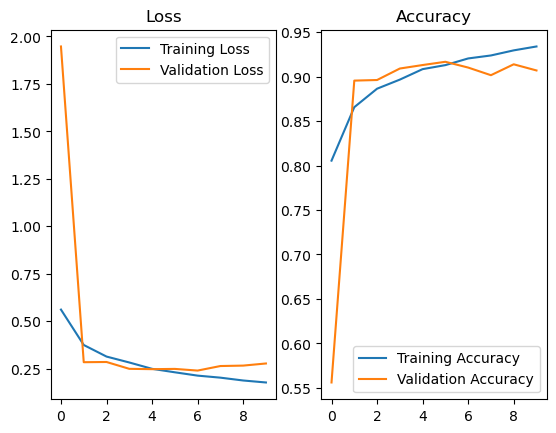

In [10]:
plt.Figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('fashion_mnist_cnn_model.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,696 (4.83 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 843,670 (3.22 MB)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
Predicted class: Bag


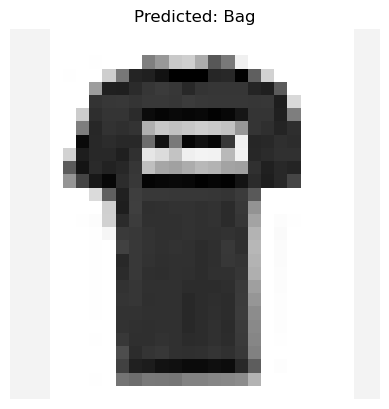

In [6]:
img_path = "Capture.PNG"
img = image.load_img(img_path, target_size=(28,28), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = img_array/255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"Predicted class: {class_names[predicted_class]}")
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()  